# Regression linéaire

In [6]:
import pandas as pd
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/advertising.csv"
df = pd.read_csv(dataset_url)
df.head()

,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Si on observe la ligne de correlation des ventes
- tv  est plus prédictive des ventes que  radio  ;
- radio  est plus prédictive que  journaux  .
L'observation est confirmée par les coefficients de corrélation :

In [11]:
df.corr()

,tv,radio,journaux,ventes
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
journaux,0.056648,0.354104,1.000000,0.228299
ventes,0.782224,0.576223,0.228299,1.000000


Matplotlib is building the font cache; this may take a moment.


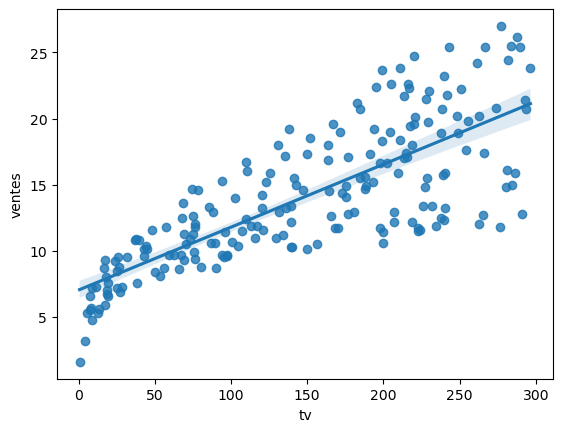

In [43]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt


# draw regplot
sns.regplot(x = "tv",
			y = "ventes", 
			data = df)

# show the plot
plt.show()



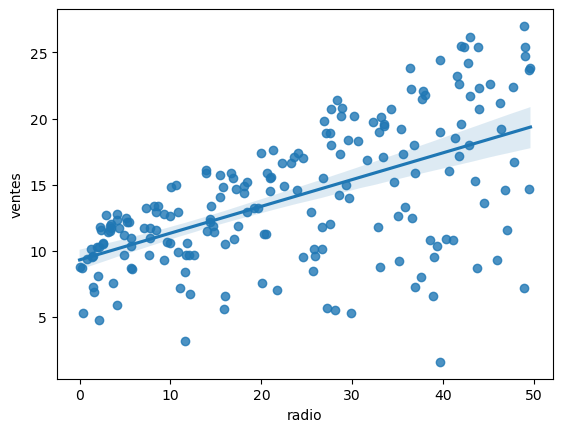

In [45]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt


# draw regplot
sns.regplot(x = "radio",
			y = "ventes", 
			data = df)

# show the plot
plt.show()

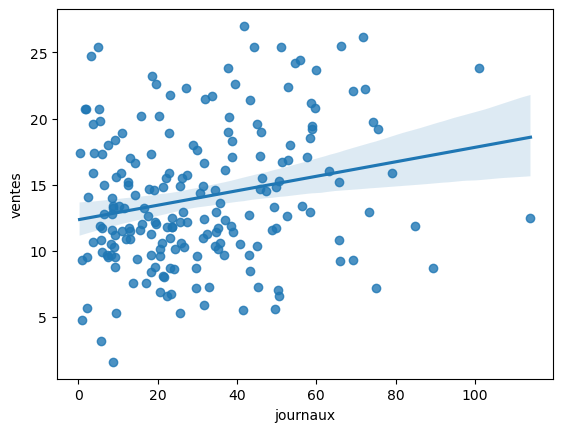

In [47]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt


# draw regplot
sns.regplot(x = "journaux",
			y = "ventes", 
			data = df)

# show the plot
plt.show()

## Définition du modèle avec séparation du jeu de test

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
reg = LinearRegression()
X = df[['tv','radio','journaux']]
y = df.ventes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Entrainement du modèle

In [39]:
reg.fit(X_train, y_train)


LinearRegression()

### Prédiciton et évaluation de l'écart

In [33]:
y_pred_test = reg.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

RMSE: 3.174097353976104
MAPE: 0.1519884660283123


# Regression plynomiale 

On peut en déduire que la relation entre  ventes  et  tv  n'est pas simplement linéaire, c'est-à-dire :

ventes=a∗tv+b

Mais cela dépend aussi d'un terme tv2 comme ceci :

ventes=a∗tv+b∗tv2+c

C'est un polynôme du second degré de variable  tv.
On remarque que l'amplitude de tv2 va être bien plus grande que celle des autres variables. On va donc normaliser les variables, pour que leurs amplitudes soient compatibles.

### Ajoustement du modèle

In [59]:
df['tv2'] = df.tv**2

### Normalisation des variables predictives

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(df)

MinMaxScaler()

In [71]:
data_array = scaler.transform(df)

In [73]:
df = pd.DataFrame(data_array, columns = ['tv','radio','journaux','ventes','tv2'])

In [75]:
df.head()

,tv,radio,journaux,ventes,tv2
0,0.775786,0.762097,0.605981,0.807087,0.602664
1,0.148123,0.792339,0.394019,0.346457,0.022535
2,0.055800,0.925403,0.606860,0.303150,0.003362
3,0.509976,0.832661,0.511873,0.665354,0.261253
4,0.609063,0.217742,0.510994,0.444882,0.372080


In [77]:
df.describe().loc[['min','max']]

,tv,radio,journaux,ventes,tv2
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


### Entrainement du modèle 

In [90]:
X = df[['tv','radio','journaux','tv2']]
y = df.ventes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [92]:
reg.fit(X_train, y_train)

LinearRegression()

In [94]:
y_hat_test = reg.predict(X_test)

In [96]:
print(f"RMSE: {mean_squared_error(y_test, y_hat_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

RMSE: 0.0036863988616064602
MAPE: 0.1620018279993566
